In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

env_var = os.environ
os.environ["LACE_REPO"] = "/nfs/pic.es/user/l/lcabayol/DESI/LaCE"
os.environ["LACE_MANAGER_REPO"] = "/nfs/pic.es/user/l/lcabayol/DESI/LaCE_manager"

In [2]:
from lace.emulator_nn.network import MDNemulator_polyfit
from lace.emulator.nn_emulator import NNEmulator
from lace.emulator.test_simulation_nn import test_sim
from lace.emulator import pd_archive


# read eBOSS P1D to plot relative error bars
from lace_manager.data import data_Chabanier2019

from lace.cosmo import camb_cosmo

# read eBOSS P1D to plot relative error bars
from lace_manager.data import data_Chabanier2019

chab=data_Chabanier2019.P1D_Chabanier2019()
cosmo_fid=camb_cosmo.get_cosmology()

/data/astro/scratch/lcabayol/anaconda3/envs/DESIenv6/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
 /data/astro/scratch/lcabayol/anaconda3/envs/DESIenv6/lib/python3.10/site-packages/lace-1.0.1-py3.10.egg/lace/emulator/pd_archive.py:210: SyntaxWarning:"is" with a literal. Did you mean "=="?
 /data/astro/scratch/lcabayol/anaconda3/envs/DESIenv6/lib/python3.10/site-packages/lace-1.0.1-py3.10.egg/lace/emulator/pd_archive.py:210: SyntaxWarning:"is" with a literal. Did you mean "=="?


In [3]:
# make pretty plots
import matplotlib
import matplotlib.pyplot as plt


font = {'size'   : 14}
matplotlib.rc('font', **font)
plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams["font.family"] = "STIXGeneral"

In [4]:
def sigma68(data): return 0.5*(np.nanquantile(data,q = 0.84,axis = 0) - np.nanquantile(data,q = 0.16,axis = 0))


In [5]:
truth=pd_archive.archivePD(z_max=4.5,pick_sim=0)
truth.average_over_samples(flag="all")
truth = [d for d in truth.data_av_all if d['ind_tau'] == 0] 

Text(0, 0.5, '$P_{\\rm 1D}$')

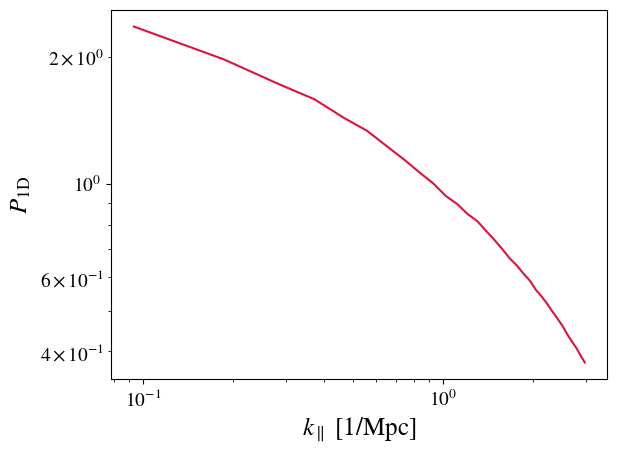

In [7]:
plt.loglog(truth[0]['k_Mpc'][1:33], truth[0]['p1d_Mpc'][1:33], color ='crimson')
plt.xlabel(r"$k_\parallel$ [1/Mpc]", fontsize = 18)
plt.ylabel(r"$P_{\rm 1D}$", fontsize = 18)


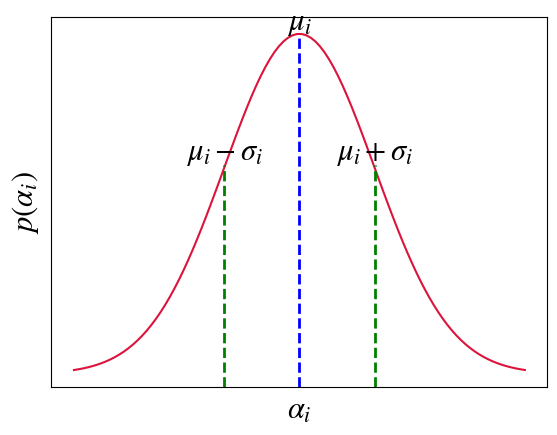

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color = 'crimson')
plt.xlabel(r"$\alpha_i$", fontsize = 22)
plt.ylabel(r"$p(\alpha_i)$", fontsize = 22)

# Plot the mean and standard deviation lines
plt.axvline(mu, color='blue', ymax=.95,linestyle='--', linewidth=2)
plt.axvline(mu+sigma, ymax=0.6, color='green', linestyle='--', linewidth=2)
plt.axvline(mu-sigma, ymax=0.6, color='green', linestyle='--', linewidth=2)
plt.text(mu, 0.395, r'$\mu_i$', fontsize=22, ha='center', va='bottom')
plt.text(mu+sigma, stats.norm.pdf(mu+sigma, mu, sigma), r'$\mu_i+\sigma_i$', fontsize=22, ha='center', va='bottom')
plt.text(mu-sigma, stats.norm.pdf(mu-sigma, mu, sigma), r'$\mu_i-\sigma_i$', fontsize=22, ha='center', va='bottom')

plt.xticks([])
plt.yticks([])

plt.show()
